In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('real_estate_valuation_data_set.csv', index_col=0)


In [3]:
data.shape

(414, 7)

In [4]:
data.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
No,,,,,,,
1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


- **X1 Transaction Date**: fecha de transacció de la casa
- **X2 House Agre**: edad de la casa (tiempo desde su construcción)
- **X3 Distance to the nearest MRT Station**: que tan cercana es la casa a una estacion de trasnporte público
- **X4 Number of convenience stores**: número de tiendas de conveniencia cercanas
- **X5 Latitude**: latitud
- **X6 Longitude**: longitud

- **Y House Price of unit area**: precio de la casa por unidad de área

### Estadísticas descriptivas

In [5]:
data.describe()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


### Incluir seaborn para Visualización

In [6]:
import seaborn as sns

In [7]:
%matplotlib inline

### Histogramas por cada variable y dispersión entre variables

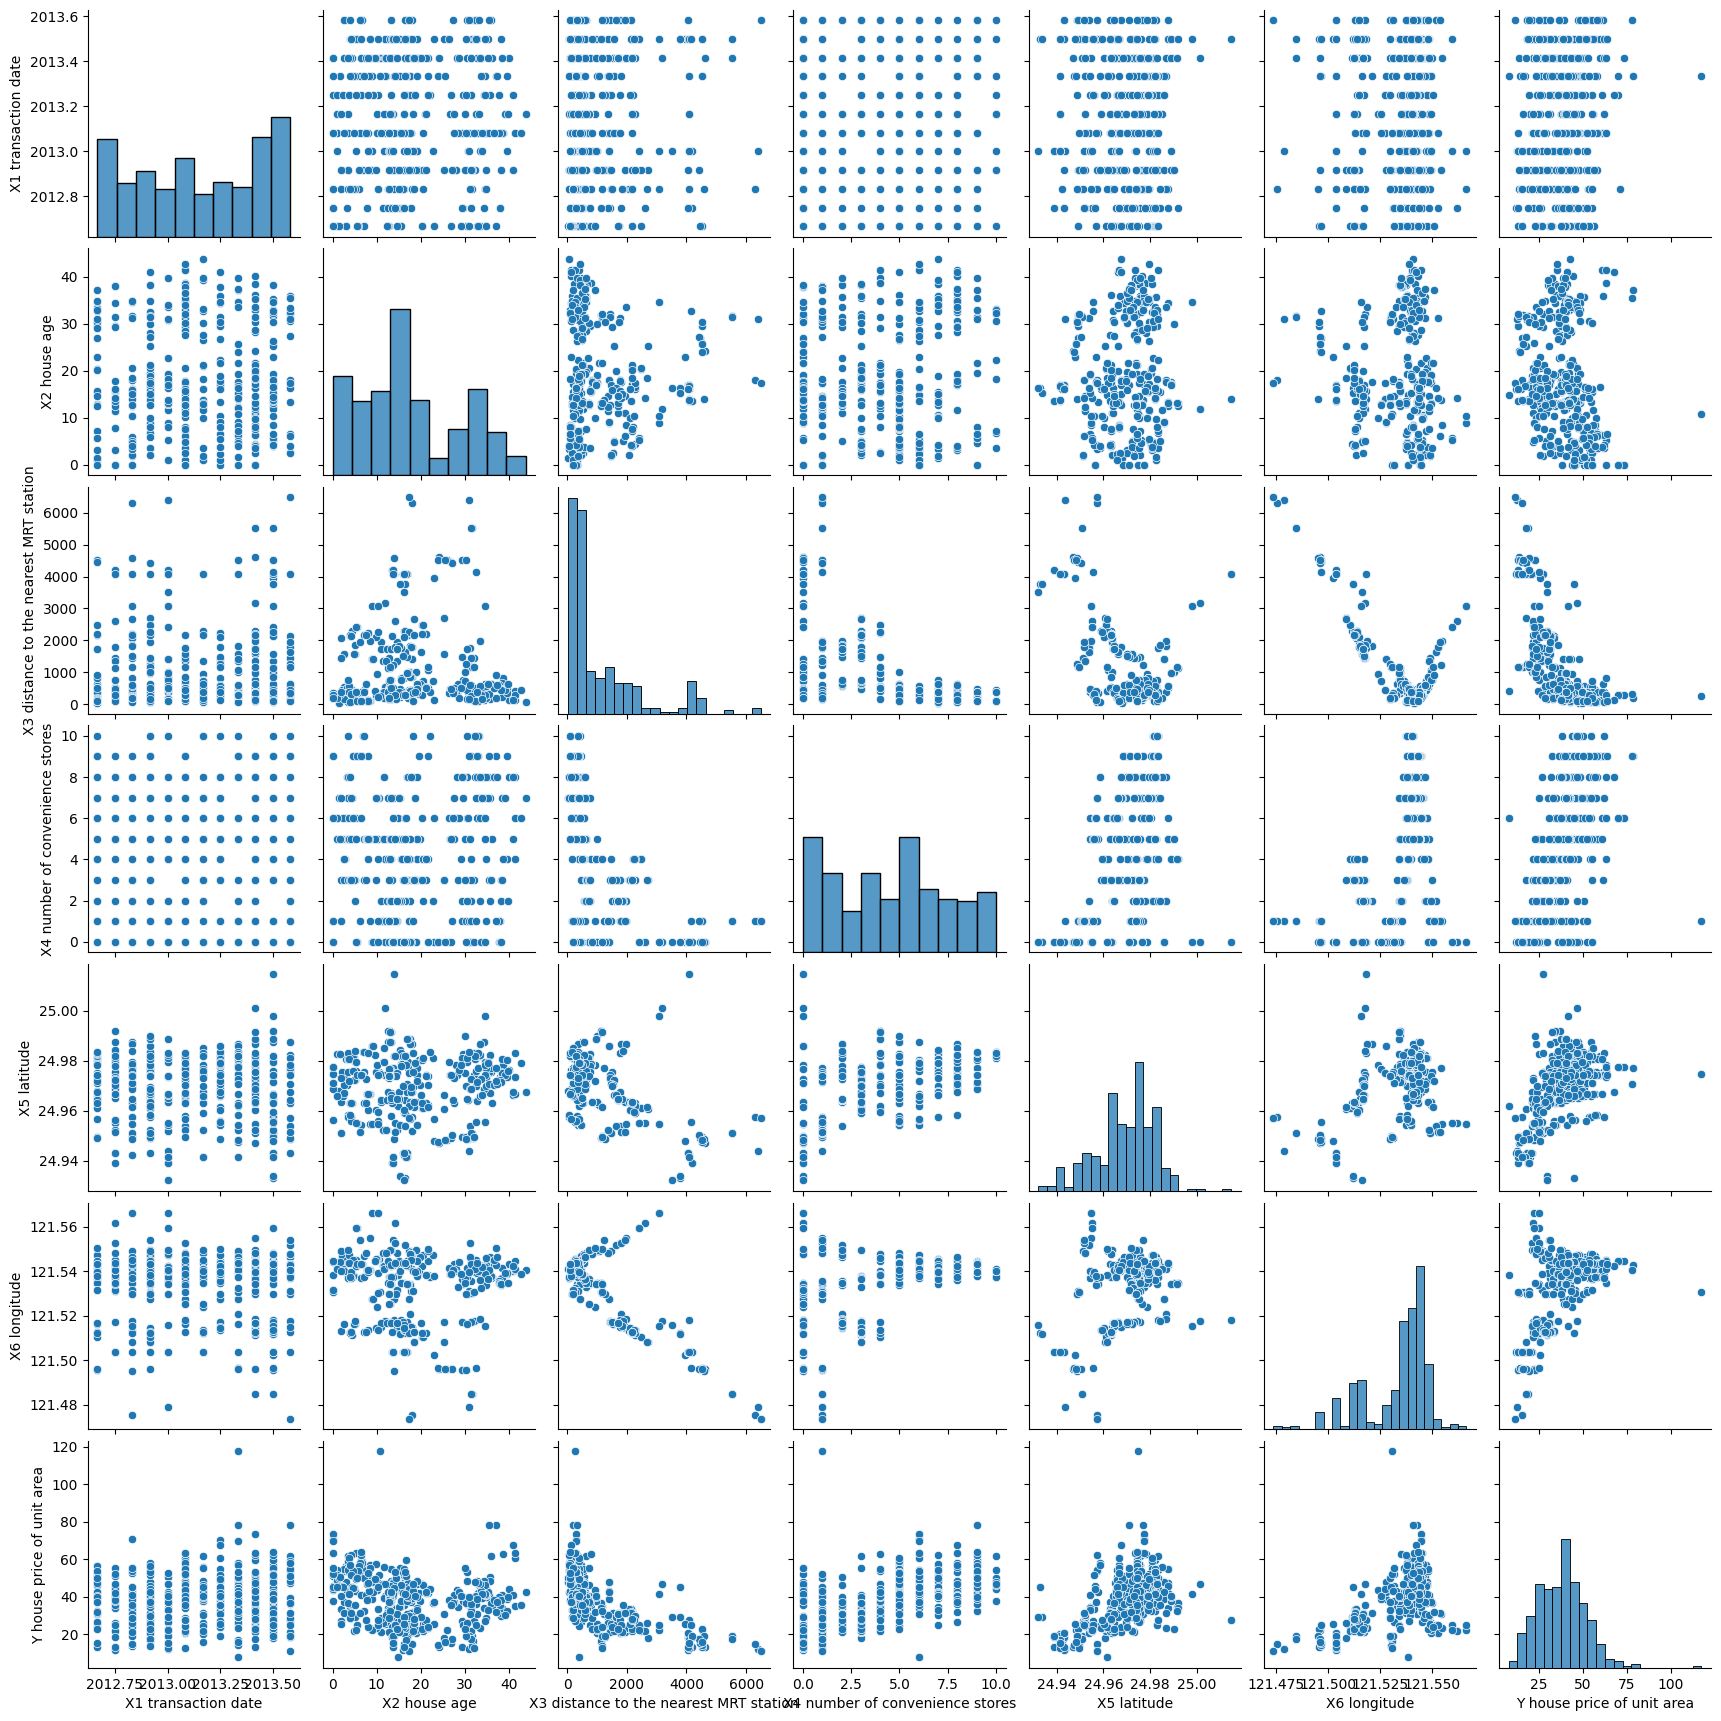

In [8]:
sns.pairplot(data,)


### Matriz de correlación

<Axes: >

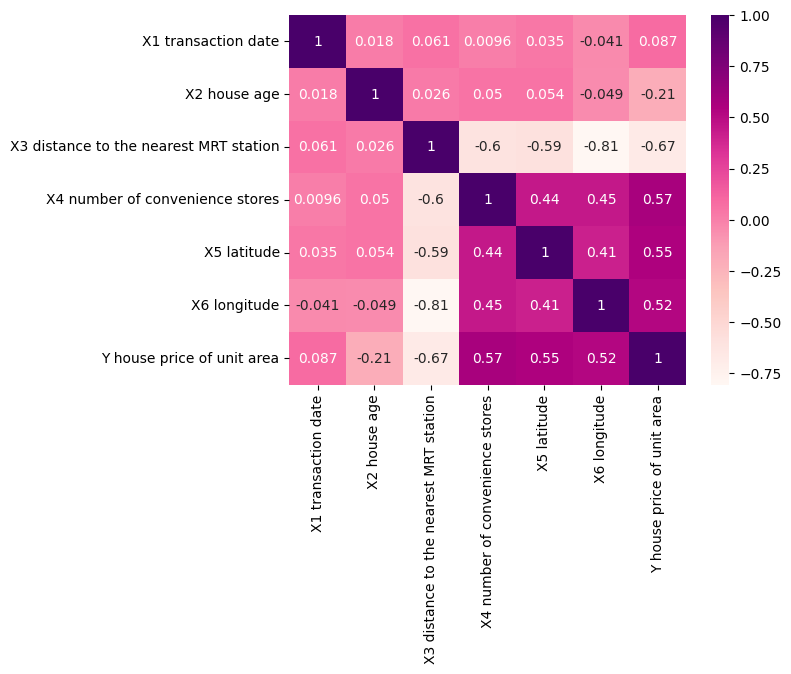

In [9]:
import seaborn as sb
corr = data.corr()
sb.heatmap(corr, cmap="RdPu", annot=True)

<Axes: >

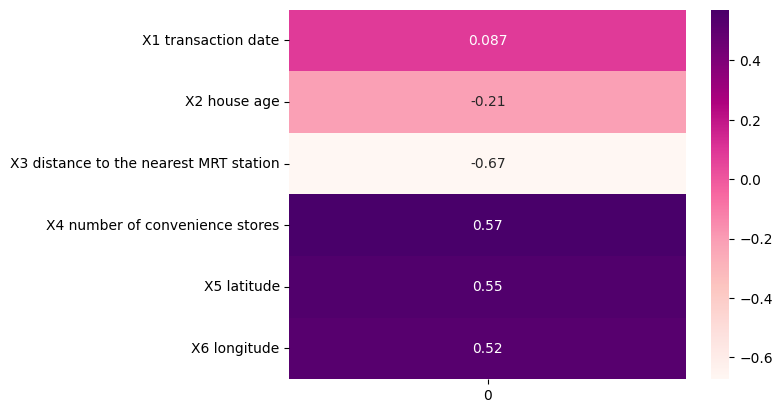

In [10]:
corrw = data.drop(['Y house price of unit area'], axis=1).corrwith(data['Y house price of unit area'])
sb.heatmap(pd.DataFrame(corrw), cmap="RdPu", annot=True)

### Diagramas de dispersión y tendencia entre variables de entrada y variable de respuesta

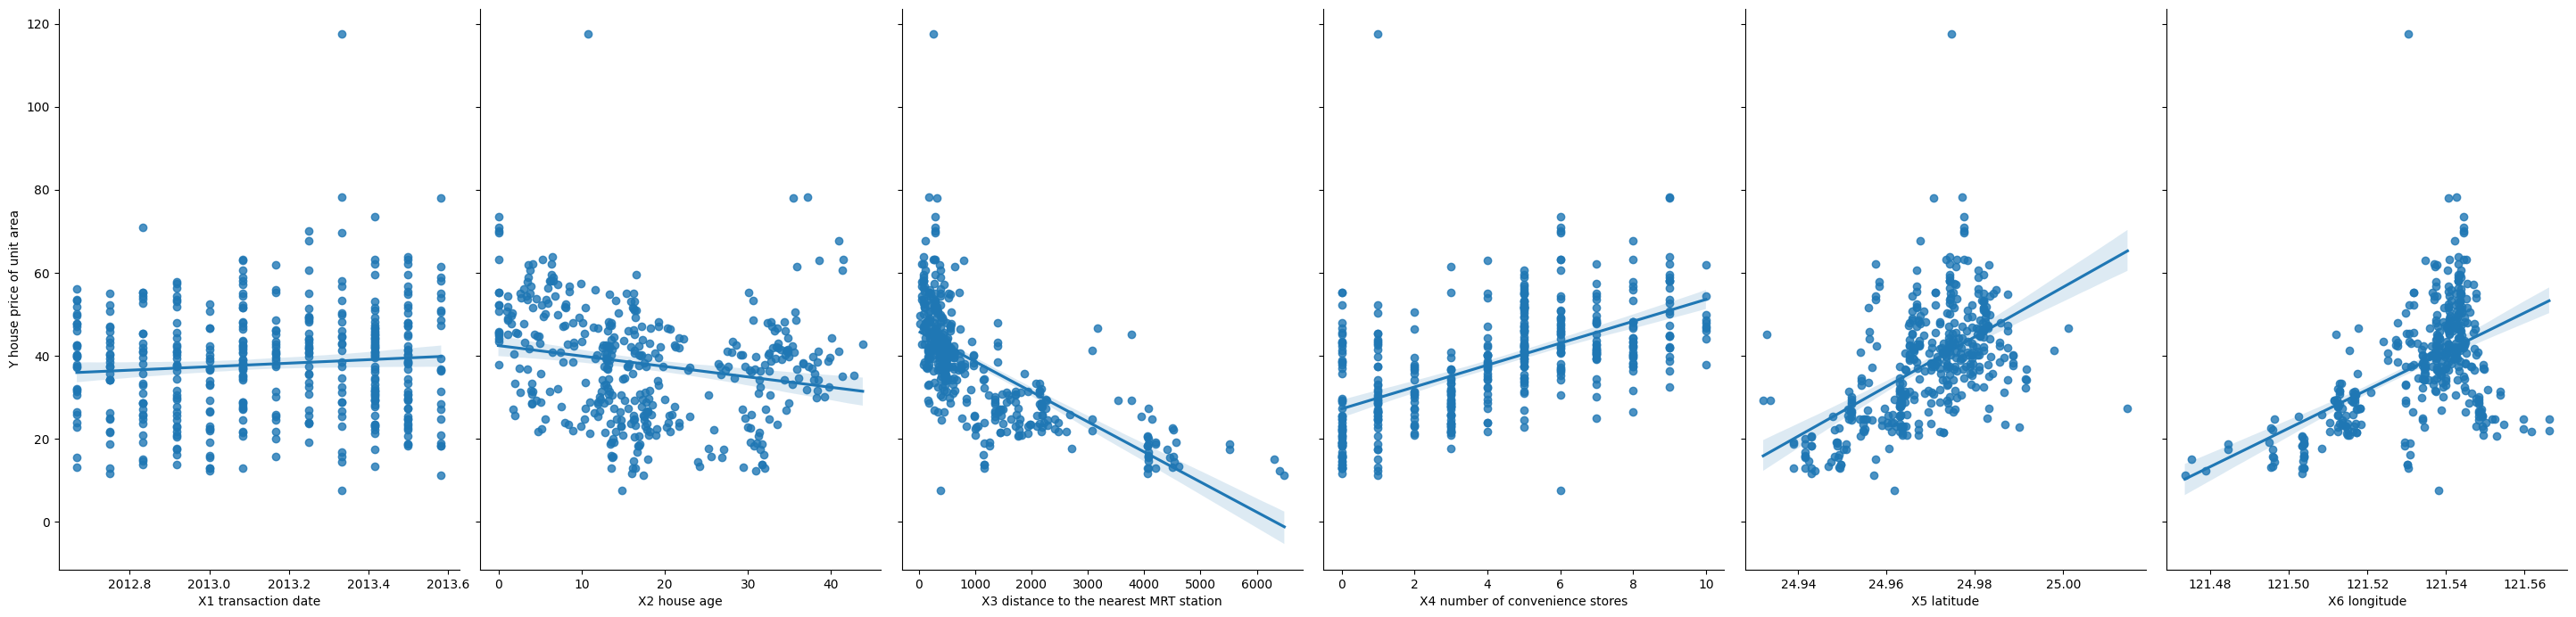

In [11]:
sns.pairplot(data, x_vars=['X1 transaction date', 'X2 house age', 'X3 distance to the nearest MRT station', 'X4 number of convenience stores', 'X5 latitude', 'X6 longitude'], y_vars='Y house price of unit area', height=7, aspect=0.7, kind='reg')


### Modelo de regresión 

$y = \beta_0 + \beta_1 \times \text{X1 transaction date} + \beta_2 \times \text{X2 house age} + \beta_3 \times \text{X3 distance to the nearest MRT station}$ + $\beta_4 \times \text{X4 number of convenience stores} + \beta_5 \times \text{X5 latitude} + \beta_6 \times \text{X6 longitude}$

In [12]:
# nombres de características
features = ['X1 transaction date', 'X2 house age', 'X3 distance to the nearest MRT station', 'X4 number of convenience stores', 'X5 latitude', 'X6 longitude']

# dataframe de características
X = data[features]

X.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
No,,,,,,
1,2012.917,32.0,84.87882,10,24.98298,121.54024
2,2012.917,19.5,306.59470,9,24.98034,121.53951
3,2013.583,13.3,561.98450,5,24.98746,121.54391
4,2013.500,13.3,561.98450,5,24.98746,121.54391
5,2012.833,5.0,390.56840,5,24.97937,121.54245


In [13]:
X.shape

(414, 6)

In [14]:
# variable de respuesta
y = data['Y house price of unit area']

y.head()

No
1    37.9
2    42.2
3    47.3
4    54.8
5    43.1
Name: Y house price of unit area, dtype: float64

In [15]:
# tipos de X y y
print(type(X))
print(type(y))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


### División entre entrenamiento y prueba

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [17]:
# tamaños 
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(310, 6)
(310,)
(104, 6)
(104,)


In [18]:
print(X.head())
print(X_train.head())

    X1 transaction date  X2 house age  X3 distance to the nearest MRT station  \
No                                                                              
1              2012.917          32.0                                84.87882   
2              2012.917          19.5                               306.59470   
3              2013.583          13.3                               561.98450   
4              2013.500          13.3                               561.98450   
5              2012.833           5.0                               390.56840   

    X4 number of convenience stores  X5 latitude  X6 longitude  
No                                                              
1                                10     24.98298     121.54024  
2                                 9     24.98034     121.53951  
3                                 5     24.98746     121.54391  
4                                 5     24.98746     121.54391  
5                                 5     24

In [19]:
# cambiando el tamaño del conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.2)

In [20]:
# tamaños 
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(331, 6)
(331,)
(83, 6)
(83,)


In [21]:
# sin reordenar los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, shuffle=False)

In [22]:
print(X.head())
print(X_train.head())

    X1 transaction date  X2 house age  X3 distance to the nearest MRT station  \
No                                                                              
1              2012.917          32.0                                84.87882   
2              2012.917          19.5                               306.59470   
3              2013.583          13.3                               561.98450   
4              2013.500          13.3                               561.98450   
5              2012.833           5.0                               390.56840   

    X4 number of convenience stores  X5 latitude  X6 longitude  
No                                                              
1                                10     24.98298     121.54024  
2                                 9     24.98034     121.53951  
3                                 5     24.98746     121.54391  
4                                 5     24.98746     121.54391  
5                                 5     24

In [23]:
# tamaños 
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(310, 6)
(310,)
(104, 6)
(104,)


In [24]:
# volviendo al caso en que cambia el tamaño del conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.2)

In [25]:
from sklearn.linear_model import LinearRegression

# crear el objeto del modelo
linreg = LinearRegression()

# ajustar los parámetros del modelo usando los datos de entrenamiento
linreg.fit(X_train, y_train)

LinearRegression()

In [26]:
# imprimir coeficientes
print(linreg.intercept_)
print(linreg.coef_)

-12796.117684899287
[ 5.71714218e+00 -2.49326467e-01 -4.93769843e-03  1.07614509e+00
  2.27037100e+02 -3.56988335e+01]


In [27]:
# coeficientes con nombre de las características
list(zip(features, linreg.coef_))

[('X1 transaction date', np.float64(5.7171421836102745)),
 ('X2 house age', np.float64(-0.24932646689585264)),
 ('X3 distance to the nearest MRT station', np.float64(-0.004937698432022964)),
 ('X4 number of convenience stores', np.float64(1.0761450934453074)),
 ('X5 latitude', np.float64(227.03710037116494)),
 ('X6 longitude', np.float64(-35.69883346505084))]

### Predicciones usando los datos de prueba

In [28]:
y_pred = linreg.predict(X_test)

### Evaluar el modelo

**Error absoluto medio**: 

$$\text{MAE} = \frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Error cuadrado medio**: 
$$\text{MSE} = \frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Raíz del Error cuadrado medio**: 
$$\text{RMSE} = \sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

In [29]:
from sklearn import metrics

In [30]:
import numpy as np

# mean absolute error
MAE = metrics.mean_absolute_error(y_test, y_pred)

# mean squared error
MSE = metrics.mean_squared_error(y_test, y_pred)

# root mean squared error
RMSE = np.sqrt(MSE)

In [31]:
print("MAE: ", MAE)
print("MSE: ", MSE)
print("RMSE: ", RMSE)

MAE:  5.343030944663339
MSE:  45.01050719519749
RMSE:  6.708987046879543


### Selección de variables - Modelo con otro subconjunto de variables

In [32]:
featuresb = ['X2 house age', 'X3 distance to the nearest MRT station', 'X4 number of convenience stores', 'X5 latitude', 'X6 longitude']

X = data[featuresb]
y = data['Y house price of unit area']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

linreg.fit(X_train, y_train)

y_pred = linreg.predict(X_test)

MAE = metrics.mean_absolute_error(y_test, y_pred)
MSE = metrics.mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(MSE)

print("MAE: ", MAE)
print("MSE: ", MSE)
print("RMSE: ", RMSE)

MAE:  5.713009860551119
MSE:  56.18950777026411
RMSE:  7.495966099860919


### Validación cruzada

In [33]:
from sklearn.model_selection import cross_val_score

# usar MSE - error cuadrático medio
scores = cross_val_score(linreg, X, y, cv=5, scoring='neg_mean_squared_error')
mse_scores = - scores
print(mse_scores)

[ 54.59490522  86.67775497  57.07068747 139.23842104  62.13711996]


In [34]:
# calcular RMSE
rmse_scores = np.sqrt(mse_scores)
print(rmse_scores)

[ 7.38883653  9.31008888  7.55451438 11.79993309  7.88271019]


In [35]:
# RMSE promedio a través de todos los grupos
print(rmse_scores.mean())

8.787216614023704


## Ahora usando statsmodels

In [36]:
import statsmodels.api as sm

features = ['X1 transaction date', 'X2 house age', 'X3 distance to the nearest MRT station', 'X4 number of convenience stores', 'X5 latitude', 'X6 longitude']

X = data[features]
y = data['Y house price of unit area']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# agregar constante explíticamente
X_train = sm.add_constant(X_train)

# regresión usando mínimos cuadrados ordinarios (ordinary least squares - OLS) 
model = sm.OLS(y_train, X_train).fit()

# resumen de resultados
print(model.summary())

                                OLS Regression Results                                
Dep. Variable:     Y house price of unit area   R-squared:                       0.543
Model:                                    OLS   Adj. R-squared:                  0.534
Method:                         Least Squares   F-statistic:                     60.00
Date:                        Mon, 26 Aug 2024   Prob (F-statistic):           1.05e-48
Time:                                16:40:26   Log-Likelihood:                -1129.0
No. Observations:                         310   AIC:                             2272.
Df Residuals:                             303   BIC:                             2298.
Df Model:                                   6                                         
Covariance Type:                    nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------

### El segundo modelo, sin Transaction date


In [37]:
featuresb = ['X2 house age', 'X3 distance to the nearest MRT station', 'X4 number of convenience stores', 'X5 latitude', 'X6 longitude']

X = data[featuresb]
y = data['Y house price of unit area']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# agregar constante explíticamente
X_train = sm.add_constant(X_train)

# regresión usando mínimos cuadrados ordinarios (ordinary least squares - OLS) 
model = sm.OLS(y_train, X_train).fit()

# resumen de resultados
print(model.summary())

                                OLS Regression Results                                
Dep. Variable:     Y house price of unit area   R-squared:                       0.532
Model:                                    OLS   Adj. R-squared:                  0.524
Method:                         Least Squares   F-statistic:                     69.11
Date:                        Mon, 26 Aug 2024   Prob (F-statistic):           4.26e-48
Time:                                16:40:26   Log-Likelihood:                -1132.7
No. Observations:                         310   AIC:                             2277.
Df Residuals:                             304   BIC:                             2300.
Df Model:                                   5                                         
Covariance Type:                    nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------

### Determinar la influencia de las observaciones

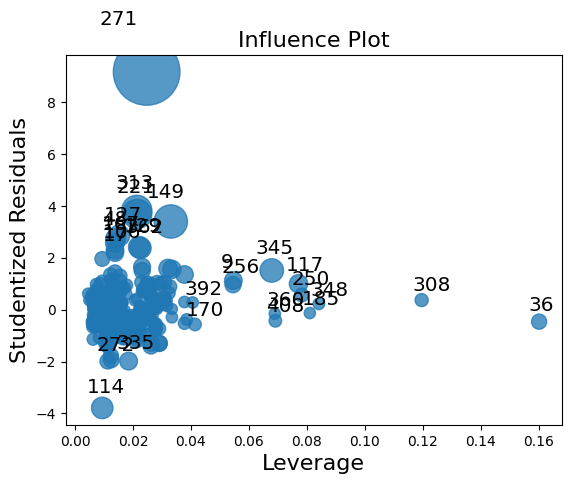

In [38]:
fig = sm.graphics.influence_plot(model, criterion="cooks")

### Determinar puntos de alta influencia con distancia de Cook y umbral $4/n$

In [39]:
# disntacia de Cook
model_cooksd = model.get_influence().cooks_distance[0]

# get length of df to obtain n
n = X_train.shape[0]

# umbral
critical_d = 4/n
print('Umbral con distancia de Cook:', critical_d)

# puntos que podrían ser ourliers con alta influencia
out_d = model_cooksd > critical_d

print(X_train.index[out_d], "\n", model_cooksd[out_d])

Umbral con distancia de Cook: 0.012903225806451613
Index([313, 271, 362, 345, 129, 48, 114, 117, 195, 221, 149, 167, 127, 383], dtype='int64', name='No') 
 [0.05090493 0.27891304 0.02142883 0.02761262 0.02155609 0.01746565
 0.02174501 0.01390174 0.01387068 0.04766242 0.06367083 0.0151752
 0.02050883 0.01379827]


In [40]:
X_train[out_d]

,const,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
No,,,,,,
313,1.0,35.4,318.5292,9,24.97071,121.54069
271,1.0,10.8,252.5822,1,24.97460,121.53046
362,1.0,41.4,281.2050,8,24.97345,121.54093
345,1.0,34.6,3085.1700,0,24.99800,121.51550
129,1.0,41.3,124.9912,6,24.96674,121.54039
48,1.0,35.9,640.7391,3,24.97563,121.53715
114,1.0,14.8,393.2606,6,24.96172,121.53812
117,1.0,30.9,6396.2830,1,24.94375,121.47883
195,1.0,15.2,3771.8950,0,24.93363,121.51158


In [41]:
y_train[out_d]

No
313     78.0
271    117.5
362     63.3
345     41.2
129     60.7
48      61.5
114      7.6
117     12.2
195     29.3
221     78.3
149     45.1
167     73.6
127     62.9
383     29.3
Name: Y house price of unit area, dtype: float64

## Modelo sin la observación 271

In [46]:
X_train_dropx = X_train.drop(index=271)
Y_train_dropy = y_train.drop(index=271)

new_model = sm.OLS(Y_train_dropy, X_train_dropx).fit()

print(new_model.summary())

                                OLS Regression Results                                
Dep. Variable:     Y house price of unit area   R-squared:                       0.589
Model:                                    OLS   Adj. R-squared:                  0.582
Method:                         Least Squares   F-statistic:                     86.85
Date:                        Mon, 26 Aug 2024   Prob (F-statistic):           2.02e-56
Time:                                16:41:34   Log-Likelihood:                -1091.7
No. Observations:                         309   AIC:                             2195.
Df Residuals:                             303   BIC:                             2218.
Df Model:                                   5                                         
Covariance Type:                    nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------